In [173]:
import pandas as pd
import numpy as np
from PIL import Image
from keras.applications import VGG16
import os
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, LSTM, Input, Embedding, Reshape, Concatenate
from keras_preprocessing import image
from collections import defaultdict
import pickle
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, plot_model
from keras.models import Model
from keras.layers.merge import add
import keras
from keras.applications.vgg16 import preprocess_input

In [2]:
images_dir = '/content/drive/My Drive/Images'
images = os.listdir(images_dir)

In [3]:
captions_path = '/content/drive/My Drive/captions (1).txt'
images_dir = 'C:\\Users\\ketan\Desktop\\Machine Learning\\Image Captioning\\Images\\'

In [4]:
len(images)

8091

In [5]:
captions_df = pd.read_csv(captions_path)
captions_df.head(20)


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [6]:
images_list = captions_df['image']
captions_list = captions_df['caption']

In [162]:
vgg16 = VGG16(include_top = True, weights='imagenet', input_shape=(224,224,3))
vgg16 = Model(inputs=vgg16.inputs, outputs=vgg16.layers[-2].output)

553467904/553467096 [==============================] - 32s 0us/step


In [ ]:
images = os.listdir(images_dir)

len(images)
try:
  image_file = open('C:\\Users\\ketan\Desktop\\Machine Learning\\Image Captioning\\imageslist.pkl','wb')
  pickle.dump(images, image_file)
  encoding_file.close()
except:
  print("Something went wrong")


In [ ]:
images = os.listdir(images_dir)

for i in range(len(images)):
  img_path = images_dir + images[i]
  img = image.load_img(img_path, target_size=(224,224))
  img_arr = image.img_to_array(img)
  img_arr = np.expand_dims(img_arr, axis=0)

  encoding = vgg16.predict(img_arr)
  encoding_dict[images[i]] = encoding
  
  if(i%200 == 0):
    print(str(i) + ' Images encoded')



0 Images encoded
200 Images encoded
400 Images encoded
600 Images encoded
800 Images encoded
1000 Images encoded
1200 Images encoded
1400 Images encoded
1600 Images encoded
1800 Images encoded
2000 Images encoded
2200 Images encoded
2400 Images encoded
2600 Images encoded
2800 Images encoded
3000 Images encoded
3200 Images encoded
3400 Images encoded
3600 Images encoded
3800 Images encoded
4000 Images encoded
4200 Images encoded
4400 Images encoded
4600 Images encoded
4800 Images encoded
5000 Images encoded
5200 Images encoded
5400 Images encoded
5600 Images encoded
5800 Images encoded
6000 Images encoded
6200 Images encoded
6400 Images encoded
6600 Images encoded
6800 Images encoded
7000 Images encoded
7200 Images encoded
7400 Images encoded
7600 Images encoded
7800 Images encoded
8000 Images encoded


In [ ]:
encoding_dict[images[0]].shape

(1, 4096)

In [12]:

try:
  encoding_file = open('/content/drive/My Drive/encodings_df.pkl')
  pickle.dump(captions_df, encoding_file)
  encoding_file.close()
except:
  print("Something went wrong")


Something went wrong


In [7]:
with open('/content/drive/My Drive/imageslist.pkl', 'rb') as f:
    images = pickle.load(f)
with open('/content/drive/My Drive/encoding_dict.pkl', 'rb') as f:
    encoding_dict = pickle.load(f)

In [6]:
all_encodings = []
for j in range(len(images_list)):
  for i in range(len(images)):
    if (images_list[j] == images[i]):
     all_encodings.append(encoding_dict[images[i]])


In [7]:
captions_df['encodings'] = all_encodings


In [8]:
captions_df.head(20)

,image,caption,encodings
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[[6.911768, 0.0, 0.0, 0.0, 0.0, 0.4691267, 0.0..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[[6.911768, 0.0, 0.0, 0.0, 0.0, 0.4691267, 0.0..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[[6.911768, 0.0, 0.0, 0.0, 0.0, 0.4691267, 0.0..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[[6.911768, 0.0, 0.0, 0.0, 0.0, 0.4691267, 0.0..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[[6.911768, 0.0, 0.0, 0.0, 0.0, 0.4691267, 0.0..."
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting,"[[0.0, 0.0, 0.37963462, 0.0, 0.91217643, 0.0, ..."
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...,"[[0.0, 0.0, 0.37963462, 0.0, 0.91217643, 0.0, ..."
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...,"[[0.0, 0.0, 0.37963462, 0.0, 0.91217643, 0.0, ..."
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...,"[[0.0, 0.0, 0.37963462, 0.0, 0.91217643, 0.0, ..."
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .,"[[0.0, 0.0, 0.37963462, 0.0, 0.91217643, 0.0, ..."


In [9]:
images_list = captions_df['image']
captions_list = captions_df['caption']
encodings_list = captions_df['encodings']



In [10]:
len(images_list)

40455

In [11]:
encodings_dict = dict()

for i in range(len(images_list)):
  encodings_dict[images_list[i]] = encodings_list[i]
  

In [8]:
image_to_captions = dict()

def caption_map(image_to_captions, images_list, captions_list):

  for i in range(len(images)):
    image_to_captions[images_list[5*i]] = captions_list[5*i]

  return image_to_captions


In [9]:
image_to_captions = caption_map(image_to_captions, images_list, captions_list)


In [46]:
def clean_captions(captions_list):
  clean_captions_map = dict()
  captions = list(image_to_captions.values())
  img_id = list(image_to_captions.keys())
  for i in range(len(captions)):
    captions[i] = captions[i].lower()
  
    words = captions[i].split()

    words = [word for word in words if len(word)>1]
    words = [word for word in words if word.isalpha()]

    captions[i] = ' '.join(words)

    captions[i] = captions[i].replace('[{}]'.format(string.punctuation), ' ')

    clean_captions_map[img_id[i]] = captions[i]

  return clean_captions_map




In [47]:
clean_captions_map = clean_captions(image_to_captions)

In [228]:
def split_test_train(clean_captions_map, encoding_dict):

  train_len = 7000
  test_len = len(images) - 7000

  train_captions = dict()
  train_encodings = dict()

  test_captions = dict()
  test_encodings = dict()

  for i in range(train_len):
    train_captions[images[i]] = clean_captions_map[images[i]]
    train_encodings[images[i]] = encoding_dict[images[i]]

  for j in range(test_len):
    test_captions[images[7000 + j]] = clean_captions_map[images[7000 + j]]
    test_encodings[images[7000 + j]] = encoding_dict[images[7000 + j]]
  
  return train_captions, train_encodings, test_captions, test_encodings



In [229]:
train_captions, train_encodings, test_captions, test_encodings = split_test_train(clean_captions_map, encoding_dict)

In [50]:
def add_start_end_seq(captions):
  for keys, caps in captions.items():
    captions[keys] = 'startseq '+ captions[keys] + ' endseq'
  return captions

In [51]:
train_captions = add_start_end_seq(train_captions)

In [144]:
test_captions = add_start_end_seq(test_captions)

In [52]:
len(train_captions)


7000

In [53]:
encoding_dict['1000268201_693b08cb0e.jpg']

array([[2.507647, 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

In [230]:
def to_lines(train_captions):
  all_captions = list()
  img_id = list(train_captions.keys())

  for i in range(len(img_id)):
    img_desc = train_captions[img_id[i]]
    all_captions.append(img_desc)

  return all_captions



In [231]:
def to_tokenize(train_captions):
  
  all_captions = to_lines(train_captions)

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(all_captions)

  return tokenizer




In [232]:
tokenizer = to_tokenize(train_captions)
vocab_size = len(tokenizer.word_index) + 1


In [233]:
vocab_size

4089

In [234]:
all_train_captions = to_lines(train_captions)
maxLen = max(len(des.split()) for des in all_train_captions)

In [235]:
maxLen

28

In [236]:
X1_test, X2_test, y_test = list(), list(), list()


In [237]:
captions = list(test_captions.values())
key = list(test_captions.keys())


for j in range(len(captions)):

  features = encoding_dict[key[j]]
  captions[j] = tokenizer.texts_to_sequences([captions[j]])[0]
  cap = captions[j]
  for i in range(1,len(cap)):
       in_seq, out_seq = cap[:i], cap[i]

       in_seq = pad_sequences([in_seq], maxlen=maxLen)[0]

       out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

       X1_test.append(features[0])
       X2_test.append(in_seq)
       y_test.append(out_seq)
      

In [238]:
captions = list(train_captions.values())
key = list(train_captions.keys())
X1, X2, y = list(), list(), list()

for j in range(len(captions)):

  features = encoding_dict[key[j]]
  captions[j] = tokenizer.texts_to_sequences([captions[j]])[0]
  cap = captions[j]
  for i in range(1,len(cap)):
       in_seq, out_seq = cap[:i], cap[i]

       in_seq = pad_sequences([in_seq], maxlen=maxLen)[0]

       out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

       X1.append(features[0])
       X2.append(in_seq)
       y.append(out_seq)
      

In [202]:
X1_test, X2_test, y_test = create_sequences(tokenizer, maxLen, test_captions, encoding_dict, vocab_size)


In [239]:
y_test = np.array(y_test)
X1_test = np.array(X1_test)
X2_test = np.array(X2_test)

In [240]:
X1_test.shape

(8674, 4096)

In [241]:
X2 = np.array(X2)
X2.shape

(57279, 28)

In [242]:
y = np.array(y)

In [243]:
y.shape

(57279, 4089)

In [244]:
X1 = np.array(X1)
X1 = X1.reshape(57279,1,4096)


In [245]:
X1.shape

(57279, 1, 4096)

In [246]:
X1_test = X1_test.reshape(8674,1,4096)

In [248]:
X1_test.shape

(8674, 1, 4096)

In [249]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map

In [250]:
word_to_vec_map = read_glove_vector('/content/drive/My Drive/glove.6B.200d.txt')

In [251]:
words_to_index = tokenizer.word_index

In [252]:
vocab_len = vocab_size
embed_vector_len = 200

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

In [255]:
def caption_model(vocab_size, maxLen):

  input_1 = Input(shape=(1,4096))
  fe_2 = Dense(256, activation='relu')(input_1)

  input_2 = Input((maxLen,))

  emb = Embedding(vocab_size, embed_vector_len, mask_zero=True, weights = [emb_matrix], trainable=False)(input_2)
  emb2 = LSTM(256)(emb)
  res = Reshape((1,256))(emb2)

  decoder1 = Concatenate()([fe_2,res])
  decoder2 = Dense(256, activation='relu')(decoder1)
  output = Dense(vocab_size, activation='softmax')(decoder2)
  output = Reshape((vocab_size,))(output)

  model = Model(inputs = [input_1, input_2], outputs=output)

  return model




In [256]:
model = caption_model(vocab_size, maxLen)

In [257]:
model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 28)]         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 28, 200)      817800      input_18[0][0]                   
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 1, 4096)]    0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 256)          467968      embedding_7[0][0]                
______________________________________________________________________________________

In [260]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit([X1,X2], y, epochs=50, batch_size=64, validation_data=([X1_test,X2_test],y_test))

Epoch 1/50
895/895 [==============================] - 63s 71ms/step - loss: 5.8700 - accuracy: 0.1009 - val_loss: 5.1842 - val_accuracy: 0.1530
Epoch 2/50
895/895 [==============================] - 62s 69ms/step - loss: 4.9452 - accuracy: 0.1704 - val_loss: 4.7433 - val_accuracy: 0.1876
Epoch 3/50
895/895 [==============================] - 62s 69ms/step - loss: 4.4397 - accuracy: 0.2068 - val_loss: 4.5205 - val_accuracy: 0.2069
Epoch 4/50
895/895 [==============================] - 63s 70ms/step - loss: 4.0493 - accuracy: 0.2322 - val_loss: 4.3828 - val_accuracy: 0.2207
Epoch 5/50
387/895 [===========>..................] - ETA: 34s - loss: 3.7175 - accuracy: 0.2586

In [132]:
model.load_weights('/content/drive/My Drive/image_caption_model1_weights.hdf5')

In [118]:
def word_for_id(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == integer:
      return word
  return None

In [127]:
def generate_cap(model, tokenizer, encoding, maxLen):
  in_text = 'startseq'
  for i in range(maxLen):

    encoding = encoding.reshape(1,1,4096)

    sequence = tokenizer.texts_to_sequences([in_text])[0]

    sequence = pad_sequences([sequence], maxlen=maxLen)

    yhat = model.predict([encoding,sequence])

    yhat = np.argmax(yhat)

    word = word_for_id(yhat, tokenizer)

    if word is None:
      break
    
    in_text += ' ' + word

    if word == 'endseq':
      break
  return in_text
  

In [160]:
i = np.random.randint(7000,8090)
true_cap = clean_captions_map[images[i]]
pred_cap = generate_cap(model, tokenizer, encoding_dict[images[i]], maxLen)
print('Predicted Caption : ',pred_cap)
print('True Caption :',true_cap)
img = Image.open('/content/drive/My Drive/Images/' + images[i])


Predicted Caption :  startseq jockey jockey in black and sunglasses sitting at something at something endseq
True Caption : lady is giving speech dealing with the armenian genocide


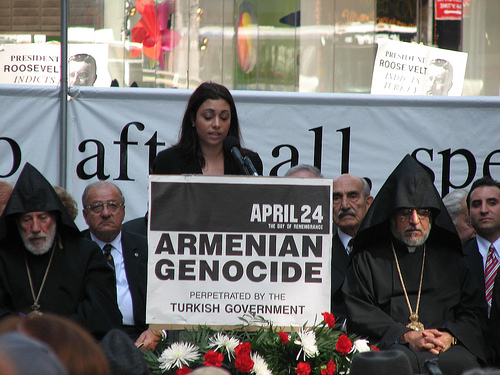

In [161]:
img

In [ ]:
img = Image.open('/content/drive/My Drive/Images/' + images[789])

In [181]:
def any_image(image_path, model, tokenizer, maxLen, vgg16):

  img = image.load_img(image_path, target_size=(224,224))

  img_arr = image.img_to_array(img)

  img_arr = img_arr.reshape((1, img_arr.shape[0], img_arr.shape[1], img_arr.shape[2]))

  img_arr = preprocess_input(img_arr)

  encoding = vgg16.predict(img_arr)

  pred_cap = generate_cap(model, tokenizer, encoding, maxLen)

  plt.imshow(img)

  print(pred_cap)








startseq two people on the red way way between two white mountain between the mountain endseq


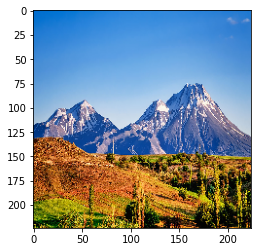

In [192]:
any_image('mountain.jpg', model, tokenizer, maxLen, vgg16)